<a href="https://colab.research.google.com/github/AymanBard/MachineLearningOption/blob/main/%5B05%5D_Regression_non_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La régression non-linéaire avec PyTorch
On génère en premier lieu un jeu de données synthétique de régression qui requiert un réseau de neuronnes non-linéaire pour être correctement approximé.

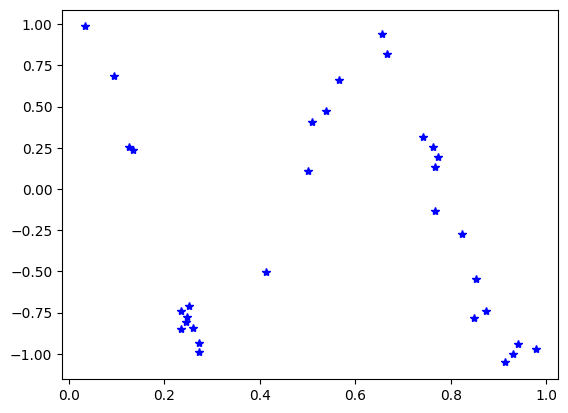

In [ ]:
import torch
import matplotlib.pyplot as plt
nb_points = 32
data_x = torch.rand(nb_points, 1)
data_y = torch.cos(10 * data_x) + torch.randn(nb_points, 1) * .1

plt.plot(data_x, data_y, '*b')
plt.show()

## Exercices


### 1.
Programmer un réseau de neurones non-linéaire avec au moins une couche cachée. Étendre la classe [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) et utiliser [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) pour la fonction linéaire, et [`torch.nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) ou [`torch.nn.Tanh`](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html) pour la non-linéarité.

In [ ]:
class ReseauNeurones(torch.nn.Module):
  '''
   in_dim : dimension des attributs,
   h_dim : taille de la couche cachée,
   out_dim : dimension des données de supervision.
  '''
  def __init__(self, in_dim, h_dim, out_dim):
    super().__init__()
    # Créer des instances des fonctions linéaires et non-linéaires ici

  # forward : retourne la prédiction f(x) du modèle sur les données x
  def forward(self, x):
    # x : matrice de taille [K, IN_DIM]
    pass


In [ ]:
f = torch.nn.Linear(13, 2)
x = torch.randn(50, 13)
print(f(x).shape)
print(f.weight.shape)

torch.Size([50, 2])
torch.Size([2, 13])


**Affichage du modèle**

In [ ]:
model = ReseauNeurones(1, 50, 1)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data_x, data_y, '*b')
o = torch.arange(0, 1, .01).unsqueeze(1)
a = model(o).detach()
plt.plot(o.squeeze(), a.squeeze(), '-g')


### 2.

Optimiser les paramètres du modèle pour minimiser l'erreur quadratique moyenne.

Utiliser pour cela la classe [`torch.optim.SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) qui implémente la descente de gradient et automatise les opérations de torch comme mettre le champs `.grad` à zéro.

La classe `torch.nn.SGD` s'utilise de cette façon

*   Créer une instance de la class avec `optim = torch.optim.SGD(model.parameters(), lr=alpha)`, où la fonction `model.parameters()` va retourner un `iterator` de tous les paramètres du `model`. Cette fonction est déjà définie pour la classe `ReseauNeurones` par héritage. Le deuxième paramètre est le pas de gradient (learning rate en anglais).
*   La fonction `optim.zero_grad()` qui va parcourir tous les `tensor` retournés par `model.parameters()` et mettre la champs `.grad` à zéro.
*   La fonction `optim.step()` va faire la mise à jour de la descente de gradient. Il faut avoir appelé au préalable dans votre code la fonction `backward()`



In [ ]:
model = ReseauNeurones(1, 100, 1)
# Régression non-linéaire

### 3. Données réelles

Apprendre un modèle prédictif sur le jeu de données `diabetes`. Quel score $R^2$ vous obtenez avec un réseau de neurones?

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
